# Библиотеки

In [5]:
from zlib import crc32
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from statsmodels.stats.weightstats  import ttest_ind

# Код генерации выборки

In [6]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    tip = rs.randint(low = 0, high = 4)
    C1 = rs.choice([1, 5], size = 1000)
    C2 = rs.choice([2, 4], size = 1000)
    if tip == 0 :
        data = rs.randn(1000)
    if tip == 1:
        data = []
        for c1,c2 in zip(C1, C2):
            if c1 == 1:
                data.append(rs.randn(1) + 1)
            if c1 == 5:
                data.append(rs.randn(1) - 1)
        data = np.array(data)
    if tip == 2:
        data = []
        for c1,c2 in zip(C1, C2):
            if c1==1:
                c1 = 0
            else:
                c1= 1
            if c2 ==2:
                c2 = 0
            else:
                c2 = 1
            data.append(rs.randn(1) + c1 + c2)    
    if tip == 3:# on c1, c2
        data = []
        for c1,c2 in zip(C1,C2):
            if c1==1:
                c1 = 0
            else:
                c1= 1
            if c2 ==2:
                c2 = 0
            else:
                c2 = 1
            data.append(rs.randn(1) + c1 + c2 + 5*c1*c2)   
        data = np.array(data)
    return np.hstack([np.array(data).reshape(1000, 1), C1.reshape(1000, 1), C2.reshape(1000, 1)])

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [7]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task #yurchenko.aa@phystech.edu

Enter your mail: #yurchenko.aa@phystech.edu


{'mail': '#yurchenko.aa@phystech.edu',
 'id': 1370804284,
 'data': array([[ 0.04060904,  1.        ,  4.        ],
        [-0.46515744,  5.        ,  2.        ],
        [ 3.31229758,  5.        ,  4.        ],
        ...,
        [ 0.35247113,  1.        ,  2.        ],
        [ 0.3863137 ,  5.        ,  2.        ],
        [ 2.21394882,  5.        ,  4.        ]])}

# Работа с выборкой

In [8]:
data = task['data']

In [9]:
data = pd.DataFrame(
    data,
    columns = ['f', 'c_1', 'c_2']
)

data

,f,c_1,c_2
0,0.040609,1.0,4.0
1,-0.465157,5.0,2.0
2,3.312298,5.0,4.0
3,0.768822,5.0,2.0
4,1.792609,5.0,4.0
...,...,...,...
995,2.290289,5.0,2.0
996,0.243852,1.0,2.0
997,0.352471,1.0,2.0
998,0.386314,5.0,2.0


In [10]:
data.c_1.unique(), data.c_2.unique()

(array([1., 5.]), array([4., 2.]))

In [11]:
lm = ols('f ~ C(c_1) * C(c_2)', data=data).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(c_1),1.0,316.551745,316.551745,313.441943,3.435525e-61
C(c_2),1.0,292.335847,292.335847,289.463942,3.517793e-57
C(c_1):C(c_2),1.0,2.331605,2.331605,2.308700,1.289690e-01
Residual,996.0,1005.881775,1.009921,NaN,NaN


### Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная C1 на переменную f в данной линейной модели? 

In [12]:
result.loc['C(c_1)', 'PR(>F)']

3.435524901237305e-61

PR(>F) > 0.05 для c_1 $\Rightarrow$ не влияет

### Проверить с использованием двухфакторного дисперсионного анализа, влияет ли переменная C2 на переменную f в данной линейной модели? 

In [13]:
result.loc['C(c_2)', 'PR(>F)']

3.5177925781020045e-57

PR(>F) > 0.05 для c_2 $\Rightarrow$ не влияет

### Проверить с использованием двухфакторного дисперсионного анализа, влияет ли межфакторное взаимодействие на переменную f в данной линейной модели?

In [14]:
result.loc['C(c_1):C(c_2)', 'PR(>F)']

0.12896898587324687

PR(>F) > 0.05 для c_1:с_2 $\Rightarrow$ не влияет

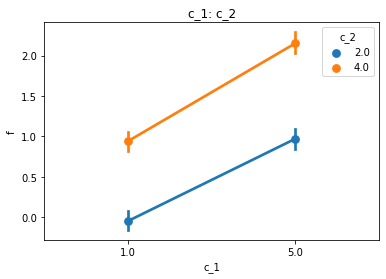

In [15]:
plt.title('c_1: c_2')
_ = sns.pointplot(x="c_1", y="f", data=data, hue = 'c_2')
plt.show()

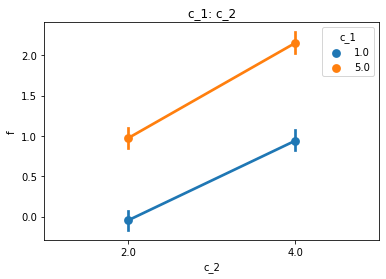

In [16]:
plt.title('c_1: c_2')
_ = sns.pointplot(x="c_2", y="f", data=data, hue = 'c_1')
plt.show()

In [24]:
rs = np.random.RandomState(42)

df = pd.DataFrame()
df['profit'] = rs.normal(1e10, 1e9, 50)
df['age'] = list(map(int, rs.normal(35, 10, 50)))
df['employees'] = list(map(int, rs.uniform(1000, 2000, 50)))
df.head()

,profit,age,employees
0,1.049671e+10,38,1417
1,9.861736e+09,31,1222
2,1.064769e+10,28,1119
3,1.152303e+10,41,1337
4,9.765847e+09,45,1942


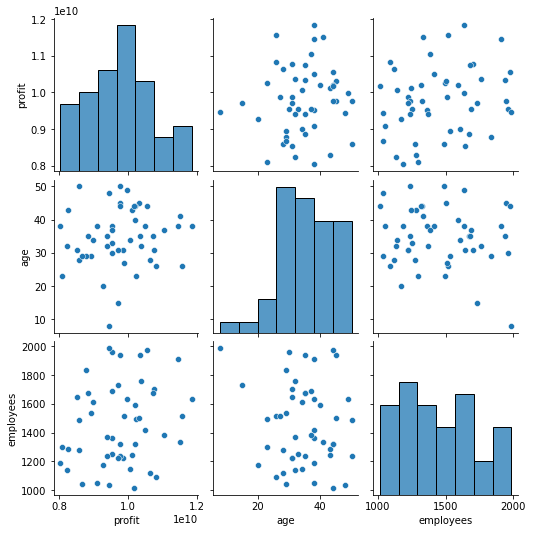

In [25]:
sns.pairplot(data = df)
None

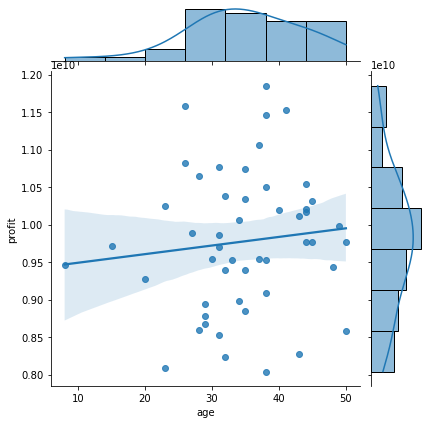

In [26]:
sns.jointplot(data=df, x='age', y='profit', kind='reg')

In [27]:
df.corr().style.background_gradient(cmap='coolwarm').format(precision = 2)

,profit,age,employees
profit,1.00,0.11,0.22
age,0.11,1.00,-0.13
employees,0.22,-0.13,1.00


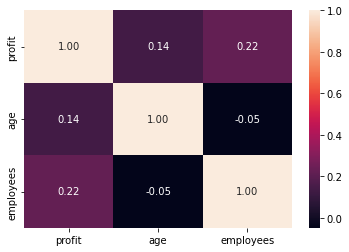

In [28]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".2f");

In [29]:
lm = ols('profit ~ employees * age', data=df).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
employees,1.0,1.981702e+18,1.981702e+18,2.296327,0.136522
age,1.0,7.984987e+17,7.984987e+17,0.925272,0.341124
employees:age,1.0,2.374836e+17,2.374836e+17,0.275188,0.602392
Residual,46.0,3.969745e+19,8.629880e+17,NaN,NaN


In [31]:
lm = ols('profit ~ age', data=df).fit()
result = sm.stats.anova_lm(lm, typ=1)
result

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,4.986675e+17,4.986675e+17,0.566984,0.455137
Residual,48.0,4.221646e+19,8.795097e+17,NaN,NaN
